# The origin of gradient descent

https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f


In [2]:
# shape[0] gives you rows' number shpae[1] gives you columns number

In [1]:
from google.colab import drive # Import a library named google.colab
drive.mount('/content/drive', force_remount=True) # mount the content to the directory `/content/drive`

%cd /content/drive/MyDrive/Tensorflow_Practice
# !mkdir HW13     # I HAVE MADE IT. 


Mounted at /content/drive
/content/drive/MyDrive/Tensorflow_Practice


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


# numpy.reshape reference: https://www.geeksforgeeks.org/numpy-reshape-python/

In [13]:
# Syntax: numpy.reshape(array, shape (row, columns), order = 'C')
print(df['price'].head())
print(df['price'].values)
print(type(df['price'].values))
print(df.shape[0])
print(df['price'].values.reshape(df.shape[0], 1))

0     39.07
1    120.00
2     62.00
3     75.00
4     51.00
Name: price, dtype: float64
[ 39.07 120.    62.    75.    51.    38.   135.   155.    50.   167.
  82.   140.    38.    40.   101.    42.    48.    60.   102.    32.  ]
<class 'numpy.ndarray'>
20
[[ 39.07]
 [120.  ]
 [ 62.  ]
 [ 75.  ]
 [ 51.  ]
 [ 38.  ]
 [135.  ]
 [155.  ]
 [ 50.  ]
 [167.  ]
 [ 82.  ]
 [140.  ]
 [ 38.  ]
 [ 40.  ]
 [101.  ]
 [ 42.  ]
 [ 48.  ]
 [ 60.  ]
 [102.  ]
 [ 32.  ]]


# important scaling skills

In [20]:
from sklearn import preprocessing 
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))

print(scaled_X)
print(scaled_y)

[[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.13793103 0.25      ]
 [0.12758621 0.25      ]
 [0.6662069  0.75      ]
 [0.86206897 0.75      ]
 [0.17586207 0.5       ]
 [1.         1.        ]
 [0.34482759 0.5       ]
 [0.68448276 0.75      ]
 [0.06896552 0.25      ]
 [0.10344828 0.25      ]
 [0.5        0.5       ]
 [0.12931034 0.25      ]
 [0.13103448 0.5       ]
 [0.25517241 0.5       ]
 [0.67931034 0.5       ]
 [0.         0.        ]]
[[0.05237037]
 [0.65185185]
 [0.22222222]
 [0.31851852]
 [0.14074074]
 [0.04444444]
 [0.76296296]
 [0.91111111]
 [0.13333333]
 [1.        ]
 [0.37037037]
 [0.8       ]
 [0.04444444]
 [0.05925926]
 [0.51111111]
 [0.07407407]
 [0.11851852]
 [0.20740741]
 [0.51851852]
 [0.        ]]


In [27]:
scaled_y.reshape(20)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

# price = w1 * area + w2 * bedrooms + bias 

In [30]:
print(np.ones(shape = (5,3) ))
print(np.ones(shape = 5))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[1. 1. 1. 1. 1.]


In [36]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

  number_of_features = X.shape[1] # the feature means (area, bedroom)
  w = np.ones(shape = (number_of_features))
  b = 0
  total_samples = X.shape[0] # number of rows in X

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w, X.T) + b

    w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
    b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad 

    cost = np.mean(np.square(y_true-y_predicted))

    # if i%10==0:
    cost_list.append(cost)
    epoch_list.append(i)
  
  return w, b, cost, cost_list, epoch_list 

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0], ), 500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

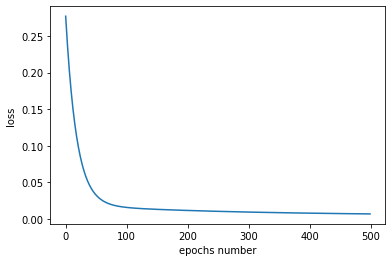

In [37]:
plt.xlabel("epochs number")
plt.ylabel("loss ")
plt.plot(epoch_list, cost_list)

In [43]:
def predict(area, bedrooms, w, b):
  scaled_X = sx.transform([[area, bedrooms]])[0] # because return 2D array and we want 1D array so we pick index 0 
  scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b 
  return sy.inverse_transform([[scaled_price]])[0][0] # because return 2D array and we want the number without array

predict(2600, 4, w, b)

128.45484403267596

# Stochastic Gradient Descent Implementation 

SGD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [44]:
import random
random.randint(0,6) # it will show all the number inside

4

In [63]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
  number_of_features = X.shape[1] # the feature means (area, bedroom)
  w = np.ones(shape = (number_of_features))
  b = 0
  total_samples = X.shape[0] # number of rows in X

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    random_index = random.randint(0, total_samples-1)
    sample_x = X[random_index]
    sample_y = y_true[random_index]

    y_predicted = np.dot(w, sample_x.T) + b 

    w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
    b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad 

    cost = np.mean(np.square(sample_y-y_predicted))

    if i%100==0:
      cost_list.append(cost)
      epoch_list.append(i)
  
  return w, b, cost, cost_list, epoch_list 

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0], ), 10000)
w_sgd, b_sgd, cost_sgd


(array([0.70615116, 0.6735551 ]), -0.23058396528506367, 0.0017770407854510255)

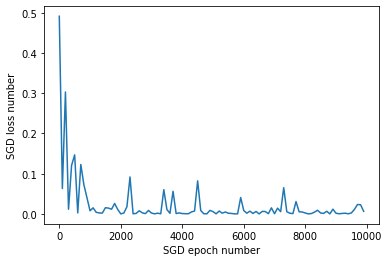

In [64]:
plt.xlabel("SGD epoch number")
plt.ylabel("SGD loss number")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [65]:
predict(2600, 4, w_sgd, b_sgd)

128.23921606072295

In [69]:
print(len(scaled_X))
j=0
indexes = [j+x for x in range(5)]
print(indexes)

20
[0, 1, 2, 3, 4]


In [84]:
def minibatch_gradient_descent(X, y_true, epochs, learning_rate=0.01, batch_size = 5):
  number_of_features = X.shape[1] # the feature means (area, bedroom)
  w = np.ones(shape = (number_of_features))
  b = 0

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    for j in range(0, 20, 5):
      indexes = [j+x for x in range(5)]
      sample_x = X[indexes]
      sample_y = y_true[indexes]

      y_predicted = np.dot(w, sample_x.T) + b 

      w_grad = -(2/len(sample_x))*(sample_x.T.dot(sample_y-y_predicted)) # the key of this is change total_sample to len(sample_x)
      b_grad = -(2/len(sample_y))*np.sum(sample_y-y_predicted)

      w = w - learning_rate * w_grad
      b = b - learning_rate * b_grad 

      cost = np.mean(np.square(sample_y-y_predicted))

    # if(i%10==0):
    cost_list.append(cost)
    epoch_list.append(i)
  
  return w, b, cost, cost_list, epoch_list 

w_mgd, b_mgd, cost_mgd, cost_list_mgd, epoch_list_mgd = minibatch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0], ), 120)
w_mgd, b_mgd, cost_mgd

(array([0.71007633, 0.67786111]), -0.23308772863573862, 0.014847470146964553)

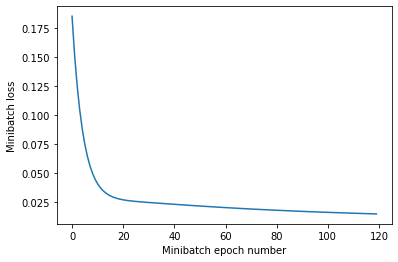

In [85]:
plt.xlabel("Minibatch epoch number")
plt.ylabel("Minibatch loss")
plt.plot(epoch_list_mgd, cost_list_mgd)